In [1]:
pip install us

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from scipy.stats import linregress
from config import api_key

In [3]:
# From Tera being awesome and helping us and giving us starter code
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
c_pull = Census(api_key, year=2011)
census_data_acs5 = c_pull.acs5.get(("NAME",
                                    "B19013_001E",
                                    "B01003_001E",
                                    "B01002_001E",
                                    "B19301_001E",
                                    "B17001_002E",
                                    "B03002_003E",
                                    "B19013A_001E",
                                    "B03002_004E",
                                    "B19013B_001E",
                                    "B03002_005E",
                                    "B19013C_001E",
                                   "B03002_006E",
                                    "B19013D_001E",
                                   "B03002_007E",
                                    "B19013E_001E",
                                   "B03002_008E",
                                    "B19013F_001E",
                                   "B03002_009E",
                                    "B19013G_001E",
                                   "B03001_003E",
                                    "B19013I_001E"),
                            {'for': 'state:*'})
# Convert to DataFrame
census_pd_2011 = pd.DataFrame(census_data_acs5)
# Column Reordering
census_pd_2011 = census_pd_2011.rename(columns={"B01003_001E": "Population",
                                                "B01002_001E": "Median Age",
                                                "B19013_001E": "Average Household Income",
                                                "B19301_001E": "Per Capita Income",
                                                "B17001_002E": "Poverty Count",
                                                "B03002_003E": "White Pop",
                                                "B19013A_001E": "White Median Income",
                                                "B03002_004E": "Black Pop",
                                                "B19013B_001E": "Black Median Income",
                                                "B03002_005E": "Native American Pop",
                                                "B19013C_001E": "Native American Median Income",
                                                "B03002_006E": "Asian Pop",
                                                "B19013D_001E": "Asian Median Income",
                                                "B03002_007E": "Pacific Islander Pop",
                                                "B19013E_001E": "Pacific Islander Median Income",
                                                "B03002_008E": "Other Race Pop",
                                                "B19013F_001E": "Other Race Median Income",
                                                "B03002_009E": "Two or More Races Pop",
                                                "B19013G_001E": "Two or More Races Median Income",
                                                "B03001_003E": "Hispanic or Latino Pop",
                                                "B19013I_001E": "Hispanic or Latino Median Income",
                                              "NAME": "Name", "zip code tabulation area": "zip"})
census_pd_2011

,Name,Average Household Income,Population,Median Age,Per Capita Income,Poverty Count,White Pop,White Median Income,Black Pop,Black Median Income,...,Asian Median Income,Pacific Islander Pop,Pacific Islander Median Income,Other Race Pop,Other Race Median Income,Two or More Races Pop,Two or More Races Median Income,Hispanic or Latino Pop,Hispanic or Latino Median Income,state
0,Alabama,42934.0,4747424.0,37.7,23483.0,813385.0,3195148.0,49284.0,1238196.0,28156.0,...,54756.0,1181.0,50500.0,3446.0,35726.0,59225.0,35892.0,173990.0,35735.0,01
1,Alaska,69014.0,700703.0,33.8,31944.0,65111.0,451256.0,75201.0,22224.0,59119.0,...,64794.0,6593.0,58362.0,809.0,59753.0,49897.0,54037.0,39212.0,60274.0,02
2,Arizona,50752.0,6337373.0,35.7,25784.0,1003575.0,3686433.0,52566.0,238499.0,40540.0,...,65194.0,11148.0,49898.0,9152.0,39440.0,103032.0,44149.0,1864375.0,39258.0,04
3,Arkansas,40149.0,2895928.0,37.3,21833.0,516822.0,2166104.0,43377.0,447041.0,25681.0,...,48249.0,4842.0,30580.0,2662.0,32842.0,47092.0,32248.0,177869.0,33696.0,05
4,California,61632.0,36969200.0,35.1,29634.0,5211481.0,15028200.0,64530.0,2159863.0,44471.0,...,75968.0,132395.0,65795.0,95169.0,46798.0,888891.0,58825.0,13752743.0,47618.0,06
5,Colorado,57685.0,4966061.0,35.9,30816.0,607727.0,3491019.0,60200.0,186206.0,39797.0,...,61939.0,5204.0,48596.0,8423.0,40250.0,103322.0,45694.0,1011545.0,40025.0,08
6,Connecticut,69243.0,3558172.0,39.8,37627.0,326771.0,2554059.0,74618.0,330025.0,43886.0,...,82022.0,1180.0,70526.0,14364.0,35912.0,56897.0,50401.0,463407.0,40257.0,09
7,Delaware,59317.0,890856.0,38.6,29659.0,96805.0,586953.0,63907.0,185245.0,43680.0,...,88818.0,261.0,35682.0,1686.0,39179.0,15698.0,48469.0,70196.0,42020.0,10
8,District of Columbia,61835.0,593955.0,34.1,43993.0,101833.0,202229.0,102084.0,304769.0,39421.0,...,76969.0,311.0,119096.0,1539.0,41410.0,9736.0,63393.0,53372.0,53754.0,11
9,Florida,47827.0,18688787.0,40.5,26733.0,2679400.0,10917419.0,50554.0,2831746.0,35334.0,...,59435.0,9993.0,51997.0,53616.0,40736.0,265712.0,43443.0,4122759.0,41498.0,12


In [4]:
# From Tera being awesome and helping us and giving us starter code
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
c_pull = Census(api_key, year=2014)
census_data_acs5 = c_pull.acs5.get(("NAME",
                                    "B19013_001E",
                                    "B01003_001E",
                                    "B01002_001E",
                                    "B19301_001E",
                                    "B17001_002E",
                                    "B03002_003E",
                                    "B19013A_001E",
                                    "B03002_004E",
                                    "B19013B_001E",
                                    "B03002_005E",
                                    "B19013C_001E",
                                   "B03002_006E",
                                    "B19013D_001E",
                                   "B03002_007E",
                                    "B19013E_001E",
                                   "B03002_008E",
                                    "B19013F_001E",
                                   "B03002_009E",
                                    "B19013G_001E",
                                   "B03001_003E",
                                    "B19013I_001E"),
                            {'for': 'state:*'})
# Convert to DataFrame
census_pd_2014 = pd.DataFrame(census_data_acs5)
# Column Reordering
census_pd_2014 = census_pd_2014.rename(columns={"B01003_001E": "Population",
                                                "B01002_001E": "Median Age",
                                                "B19013_001E": "Average Household Income",
                                                "B19301_001E": "Per Capita Income",
                                                "B17001_002E": "Poverty Count",
                                                "B03002_003E": "White Pop",
                                                "B19013A_001E": "White Median Income",
                                                "B03002_004E": "Black Pop",
                                                "B19013B_001E": "Black Median Income",
                                                "B03002_005E": "Native American Pop",
                                                "B19013C_001E": "Native American Median Income",
                                                "B03002_006E": "Asian Pop",
                                                "B19013D_001E": "Asian Median Income",
                                                "B03002_007E": "Pacific Islander Pop",
                                                "B19013E_001E": "Pacific Islander Median Income",
                                                "B03002_008E": "Other Race Pop",
                                                "B19013F_001E": "Other Race Median Income",
                                                "B03002_009E": "Two or More Races Pop",
                                                "B19013G_001E": "Two or More Races Median Income",
                                                "B03001_003E": "Hispanic or Latino Pop",
                                                "B19013I_001E": "Hispanic or Latino Median Income",
                                              "NAME": "Name", "zip code tabulation area": "zip"})
census_pd_2014

,Name,Average Household Income,Population,Median Age,Per Capita Income,Poverty Count,White Pop,White Median Income,Black Pop,Black Median Income,...,Asian Median Income,Pacific Islander Pop,Pacific Islander Median Income,Other Race Pop,Other Race Median Income,Two or More Races Pop,Two or More Races Median Income,Hispanic or Latino Pop,Hispanic or Latino Median Income,state
0,Alabama,43511.0,4817678.0,38.2,23936.0,889710.0,3206588.0,49989.0,1263162.0,29055.0,...,56276.0,1284.0,95848.0,4678.0,31911.0,69196.0,36328.0,191838.0,34763.0,01
1,Alaska,71829.0,728300.0,33.4,33129.0,71866.0,458284.0,78752.0,23787.0,55897.0,...,63551.0,7994.0,50853.0,922.0,56875.0,51817.0,55489.0,45247.0,62038.0,02
2,Arizona,49928.0,6561516.0,36.5,25537.0,1169309.0,3734853.0,51717.0,257620.0,39266.0,...,65658.0,11720.0,44390.0,7032.0,36660.0,124188.0,46722.0,1977026.0,38567.0,04
3,Arkansas,41264.0,2947036.0,37.6,22595.0,549303.0,2178191.0,44553.0,455402.0,26733.0,...,55922.0,6178.0,30118.0,2779.0,33038.0,51663.0,34322.0,198109.0,34173.0,05
4,California,61489.0,38066920.0,35.6,29906.0,6115244.0,14905601.0,64405.0,2155929.0,43476.0,...,77932.0,136464.0,60087.0,81869.0,44969.0,1044136.0,58769.0,14534449.0,47206.0,06
5,Colorado,59448.0,5197580.0,36.2,31674.0,663861.0,3605199.0,61794.0,198952.0,41980.0,...,64854.0,5921.0,55405.0,7963.0,38258.0,118910.0,47342.0,1088602.0,41982.0,08
6,Connecticut,69899.0,3592053.0,40.3,38480.0,364740.0,2508360.0,75804.0,342043.0,42838.0,...,86676.0,879.0,52900.0,11587.0,34826.0,66940.0,51642.0,512795.0,39375.0,09
7,Delaware,60231.0,917060.0,39.1,30191.0,107101.0,590218.0,64791.0,193047.0,46149.0,...,87453.0,169.0,38914.0,1794.0,40474.0,19349.0,47325.0,78598.0,46295.0,10
8,District of Columbia,69235.0,633736.0,33.7,46502.0,109378.0,224184.0,111817.0,308766.0,40829.0,...,82213.0,186.0,75156.0,1311.0,46148.0,12756.0,72630.0,62637.0,61210.0,11
9,Florida,47212.0,19361792.0,41.2,26499.0,3159259.0,10958680.0,50002.0,2979524.0,34467.0,...,61248.0,10880.0,50838.0,51634.0,38663.0,319542.0,42356.0,4517191.0,40712.0,12


In [5]:
# From Tera being awesome and helping us and giving us starter code
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
c_pull = Census(api_key, year=2018)
census_data_acs5 = c_pull.acs5.get(("NAME",
                                    "B19013_001E",
                                    "B01003_001E",
                                    "B01002_001E",
                                    "B19301_001E",
                                    "B17001_002E",
                                    "B03002_003E",
                                    "B19013A_001E",
                                    "B03002_004E",
                                    "B19013B_001E",
                                    "B03002_005E",
                                    "B19013C_001E",
                                   "B03002_006E",
                                    "B19013D_001E",
                                   "B03002_007E",
                                    "B19013E_001E",
                                   "B03002_008E",
                                    "B19013F_001E",
                                   "B03002_009E",
                                    "B19013G_001E",
                                   "B03001_003E",
                                    "B19013I_001E"),
                            {'for': 'state:*'})
# Convert to DataFrame
census_pd_2018 = pd.DataFrame(census_data_acs5)
# Column Reordering
census_pd_2018 = census_pd_2018.rename(columns={"B01003_001E": "Population",
                                                "B01002_001E": "Median Age",
                                                "B19013_001E": "Average Household Income",
                                                "B19301_001E": "Per Capita Income",
                                                "B17001_002E": "Poverty Count",
                                                "B03002_003E": "White Pop",
                                                "B19013A_001E": "White Median Income",
                                                "B03002_004E": "Black Pop",
                                                "B19013B_001E": "Black Median Income",
                                                "B03002_005E": "Native American Pop",
                                                "B19013C_001E": "Native American Median Income",
                                                "B03002_006E": "Asian Pop",
                                                "B19013D_001E": "Asian Median Income",
                                                "B03002_007E": "Pacific Islander Pop",
                                                "B19013E_001E": "Pacific Islander Median Income",
                                                "B03002_008E": "Other Race Pop",
                                                "B19013F_001E": "Other Race Median Income",
                                                "B03002_009E": "Two or More Races Pop",
                                                "B19013G_001E": "Two or More Races Median Income",
                                                "B03001_003E": "Hispanic or Latino Pop",
                                                "B19013I_001E": "Hispanic or Latino Median Income",
                                              "NAME": "Name", "zip code tabulation area": "zip"})
census_pd_2018

,Name,Average Household Income,Population,Median Age,Per Capita Income,Poverty Count,White Pop,White Median Income,Black Pop,Black Median Income,...,Asian Median Income,Pacific Islander Pop,Pacific Islander Median Income,Other Race Pop,Other Race Median Income,Two or More Races Pop,Two or More Races Median Income,Hispanic or Latino Pop,Hispanic or Latino Median Income,state
0,Minnesota,68411.0,5527358.0,37.9,36245.0,547442.0,4438071.0,71415.0,336505.0,34879.0,...,75437.0,1799.0,72917.0,7021.0,45676.0,137233.0,54537.0,292764.0,48574.0,27
1,Mississippi,43567.0,2988762.0,37.2,23434.0,599795.0,1696952.0,54244.0,1121752.0,29690.0,...,59478.0,654.0,26287.0,2858.0,42112.0,34893.0,40069.0,90493.0,43128.0,28
2,Missouri,53560.0,6090062.0,38.5,29537.0,837930.0,4848330.0,56701.0,699730.0,35710.0,...,67526.0,6037.0,48696.0,9826.0,37554.0,138157.0,42327.0,249105.0,45677.0,29
3,Montana,52559.0,1041732.0,39.8,29765.0,139063.0,898953.0,53813.0,4348.0,41484.0,...,58774.0,706.0,36380.0,486.0,48125.0,25771.0,39415.0,39019.0,42094.0,30
4,Nebraska,59116.0,1904760.0,36.4,31101.0,213790.0,1512314.0,61342.0,88442.0,34122.0,...,56627.0,1091.0,42063.0,1982.0,46853.0,39893.0,44305.0,203281.0,47200.0,31
5,Nevada,57598.0,2922849.0,37.9,29961.0,393431.0,1458093.0,61412.0,249967.0,39726.0,...,65460.0,17703.0,57109.0,8693.0,45541.0,100513.0,56504.0,831597.0,49873.0,32
6,New Hampshire,74057.0,1343622.0,42.7,38548.0,102352.0,1214547.0,74468.0,17622.0,51630.0,...,83301.0,270.0,-666666666.0,1323.0,68229.0,23818.0,58643.0,48356.0,55157.0,33
7,New Jersey,79363.0,8881845.0,39.8,40895.0,904132.0,4960005.0,85423.0,1129257.0,51309.0,...,116131.0,2255.0,48429.0,36881.0,47407.0,148884.0,68823.0,1768020.0,54160.0,34
8,New Mexico,48059.0,2092434.0,37.5,26085.0,410389.0,788308.0,50947.0,38016.0,38490.0,...,65019.0,1046.0,47311.0,4056.0,35625.0,32278.0,46036.0,1015751.0,40641.0,35
9,New York,65323.0,19618453.0,38.7,37470.0,2797985.0,10959534.0,73584.0,2808679.0,46178.0,...,72131.0,5591.0,47227.0,105032.0,40328.0,371862.0,56921.0,3705588.0,46259.0,36


In [6]:
merge_1_df = pd.merge(census_pd_2011, census_pd_2014, on="Name", suffixes= ["_2011","_2014"], how="outer")
merge_1_df

,Name,Average Household Income_2011,Population_2011,Median Age_2011,Per Capita Income_2011,Poverty Count_2011,White Pop_2011,White Median Income_2011,Black Pop_2011,Black Median Income_2011,...,Asian Median Income_2014,Pacific Islander Pop_2014,Pacific Islander Median Income_2014,Other Race Pop_2014,Other Race Median Income_2014,Two or More Races Pop_2014,Two or More Races Median Income_2014,Hispanic or Latino Pop_2014,Hispanic or Latino Median Income_2014,state_2014
0,Alabama,42934.0,4747424.0,37.7,23483.0,813385.0,3195148.0,49284.0,1238196.0,28156.0,...,56276.0,1284.0,95848.0,4678.0,31911.0,69196.0,36328.0,191838.0,34763.0,01
1,Alaska,69014.0,700703.0,33.8,31944.0,65111.0,451256.0,75201.0,22224.0,59119.0,...,63551.0,7994.0,50853.0,922.0,56875.0,51817.0,55489.0,45247.0,62038.0,02
2,Arizona,50752.0,6337373.0,35.7,25784.0,1003575.0,3686433.0,52566.0,238499.0,40540.0,...,65658.0,11720.0,44390.0,7032.0,36660.0,124188.0,46722.0,1977026.0,38567.0,04
3,Arkansas,40149.0,2895928.0,37.3,21833.0,516822.0,2166104.0,43377.0,447041.0,25681.0,...,55922.0,6178.0,30118.0,2779.0,33038.0,51663.0,34322.0,198109.0,34173.0,05
4,California,61632.0,36969200.0,35.1,29634.0,5211481.0,15028200.0,64530.0,2159863.0,44471.0,...,77932.0,136464.0,60087.0,81869.0,44969.0,1044136.0,58769.0,14534449.0,47206.0,06
5,Colorado,57685.0,4966061.0,35.9,30816.0,607727.0,3491019.0,60200.0,186206.0,39797.0,...,64854.0,5921.0,55405.0,7963.0,38258.0,118910.0,47342.0,1088602.0,41982.0,08
6,Connecticut,69243.0,3558172.0,39.8,37627.0,326771.0,2554059.0,74618.0,330025.0,43886.0,...,86676.0,879.0,52900.0,11587.0,34826.0,66940.0,51642.0,512795.0,39375.0,09
7,Delaware,59317.0,890856.0,38.6,29659.0,96805.0,586953.0,63907.0,185245.0,43680.0,...,87453.0,169.0,38914.0,1794.0,40474.0,19349.0,47325.0,78598.0,46295.0,10
8,District of Columbia,61835.0,593955.0,34.1,43993.0,101833.0,202229.0,102084.0,304769.0,39421.0,...,82213.0,186.0,75156.0,1311.0,46148.0,12756.0,72630.0,62637.0,61210.0,11
9,Florida,47827.0,18688787.0,40.5,26733.0,2679400.0,10917419.0,50554.0,2831746.0,35334.0,...,61248.0,10880.0,50838.0,51634.0,38663.0,319542.0,42356.0,4517191.0,40712.0,12


In [7]:
merge_2_df = pd.merge(merge_1_df, census_pd_2018, on="Name", how="outer")

In [8]:
merge_2_df

,Name,Average Household Income_2011,Population_2011,Median Age_2011,Per Capita Income_2011,Poverty Count_2011,White Pop_2011,White Median Income_2011,Black Pop_2011,Black Median Income_2011,...,Asian Median Income,Pacific Islander Pop,Pacific Islander Median Income,Other Race Pop,Other Race Median Income,Two or More Races Pop,Two or More Races Median Income,Hispanic or Latino Pop,Hispanic or Latino Median Income,state
0,Alabama,42934.0,4747424.0,37.7,23483.0,813385.0,3195148.0,49284.0,1238196.0,28156.0,...,62639.0,1521.0,55511.0,7503.0,35181.0,82864.0,42397.0,203146.0,38314.0,01
1,Alaska,69014.0,700703.0,33.8,31944.0,65111.0,451256.0,75201.0,22224.0,59119.0,...,69685.0,8544.0,63478.0,1459.0,67348.0,54633.0,66896.0,51186.0,66283.0,02
2,Arizona,50752.0,6337373.0,35.7,25784.0,1003575.0,3686433.0,52566.0,238499.0,40540.0,...,74430.0,12523.0,59806.0,9177.0,43471.0,154750.0,52551.0,2163312.0,45610.0,04
3,Arkansas,40149.0,2895928.0,37.3,21833.0,516822.0,2166104.0,43377.0,447041.0,25681.0,...,65919.0,7877.0,35947.0,4641.0,38589.0,65933.0,38068.0,219052.0,39787.0,05
4,California,61632.0,36969200.0,35.1,29634.0,5211481.0,15028200.0,64530.0,2159863.0,44471.0,...,91623.0,138911.0,72432.0,97763.0,52800.0,1166288.0,71932.0,15221577.0,55084.0,06
5,Colorado,57685.0,4966061.0,35.9,30816.0,607727.0,3491019.0,60200.0,186206.0,39797.0,...,73189.0,7480.0,66528.0,10352.0,48528.0,133884.0,62783.0,1184794.0,50944.0,08
6,Connecticut,69243.0,3558172.0,39.8,37627.0,326771.0,2554059.0,74618.0,330025.0,43886.0,...,93665.0,752.0,-666666666.0,11421.0,39724.0,74301.0,58137.0,561791.0,45730.0,09
7,Delaware,59317.0,890856.0,38.6,29659.0,96805.0,586953.0,63907.0,185245.0,43680.0,...,96657.0,276.0,54239.0,1804.0,53017.0,21497.0,51868.0,86315.0,53964.0,10
8,District of Columbia,61835.0,593955.0,34.1,43993.0,101833.0,202229.0,102084.0,304769.0,39421.0,...,103898.0,280.0,120500.0,2648.0,56962.0,15864.0,88597.0,74776.0,75004.0,11
9,Florida,47827.0,18688787.0,40.5,26733.0,2679400.0,10917419.0,50554.0,2831746.0,35334.0,...,68777.0,10770.0,52087.0,68744.0,44805.0,379619.0,51468.0,5184720.0,46627.0,12


In [9]:
difference_white = merge_2_df['White Median Income'] - merge_2_df['White Median Income_2014']
difference_white1 = merge_2_df['White Median Income_2014'] - merge_2_df['White Median Income_2011']
merge_2_df['Difference in White Median Income (2011-2014)'] = difference_white1
merge_2_df['Difference in White Median Income (2014-2018)'] = difference_white

difference_black = merge_2_df['Black Median Income'] - merge_2_df['Black Median Income_2014']
difference_black1 = merge_2_df['Black Median Income_2014'] - merge_2_df['Black Median Income_2011']
merge_2_df['Difference in Black Median Income (2011-2014)'] = difference_black1
merge_2_df['Difference in Black Median Income (2014-2018)'] = difference_black

difference_asian = merge_2_df['Asian Median Income'] - merge_2_df['Asian Median Income_2014']
difference_asian1 = merge_2_df['Asian Median Income_2014'] - merge_2_df['Asian Median Income_2011']
merge_2_df['Difference in Asian Median Income (2011-2014)'] = difference_asian1
merge_2_df['Difference in Asian Median Income (2014-2018)'] = difference_asian

difference_hispanic = merge_2_df['Hispanic or Latino Median Income'] - merge_2_df['Hispanic or Latino Median Income_2014']
difference_hispanic1 = merge_2_df['Hispanic or Latino Median Income_2014'] - merge_2_df['Hispanic or Latino Median Income_2011']
merge_2_df['Difference in Hispanic or Latino Median Income (2011-2014)'] = difference_hispanic1
merge_2_df['Difference in Hispanic or Latino Median Income (2014-2018)'] = difference_hispanic
 

In [10]:
clean_df = merge_2_df.drop(columns=['Population_2011', 'Median Age_2011', 'Per Capita Income_2011', 'Poverty Count_2011', 'state_2011','Population_2014', 'Median Age_2014', 'Per Capita Income_2014', 'Poverty Count_2014', 'state_2014', 'Population', 'Median Age', 'Per Capita Income', 'Poverty Count', 'state'])

In [11]:
washington_df = clean_df.loc[clean_df['Name']=='Washington']


In [12]:
washington_df

,Name,Average Household Income_2011,White Pop_2011,White Median Income_2011,Black Pop_2011,Black Median Income_2011,Native American Pop_2011,Native American Median Income_2011,Asian Pop_2011,Asian Median Income_2011,...,Hispanic or Latino Pop,Hispanic or Latino Median Income,Difference in White Median Income (2011-2014),Difference in White Median Income (2014-2018),Difference in Black Median Income (2011-2014),Difference in Black Median Income (2014-2018),Difference in Asian Median Income (2011-2014),Difference in Asian Median Income (2014-2018),Difference in Hispanic or Latino Median Income (2011-2014),Difference in Hispanic or Latino Median Income (2014-2018)
47,Washington,58890.0,4861907.0,60563.0,225354.0,40418.0,82398.0,41588.0,467107.0,68652.0,...,911573.0,52879.0,1169.0,9734.0,1702.0,8367.0,3778.0,17701.0,899.0,9934.0


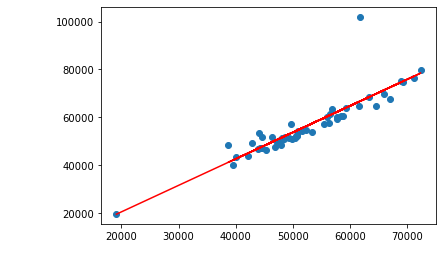

In [18]:
x_values = clean_df['Average Household Income_2011']
y_values = clean_df['White Median Income_2011']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,5),fontsize=15,color="red")
plt.show()

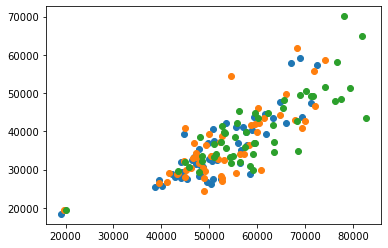

In [14]:
plt.scatter(clean_df['Average Household Income_2011'], clean_df['Black Median Income_2011'])
plt.scatter(clean_df['Average Household Income_2014'], clean_df['Black Median Income_2014'])
plt.scatter(clean_df['Average Household Income'], clean_df['Black Median Income'])

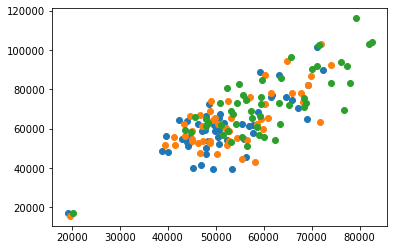

In [15]:
plt.scatter(clean_df['Average Household Income_2011'], clean_df['Asian Median Income_2011'])
plt.scatter(clean_df['Average Household Income_2014'], clean_df['Asian Median Income_2014'])
plt.scatter(clean_df['Average Household Income'], clean_df['Asian Median Income'])

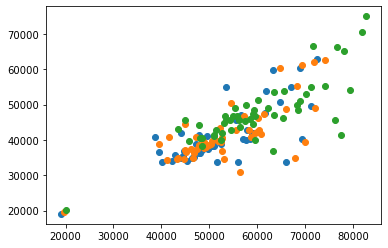

In [16]:
plt.scatter(clean_df['Average Household Income_2011'], clean_df['Hispanic or Latino Median Income_2011'])
plt.scatter(clean_df['Average Household Income_2014'], clean_df['Hispanic or Latino Median Income_2014'])
plt.scatter(clean_df['Average Household Income'], clean_df['Hispanic or Latino Median Income'])